### Import libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from keras.utils.vis_utils import plot_model
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from timeit import default_timer as timer
import os
import random
import glob
import shutil

In [ ]:
tf.__version__

'2.8.0'

### Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Colab Notebooks/Advanced Topics Course/Final Project")

Mounted at /content/drive


In [ ]:
train_path = "train_new"
valid_path = "valid_new"
test_path = "test_new"

classes = classes = ["affenpinscher", 
           "afghan_hound", 
           "african_hunting_dog",
           "airedale",
           "american_staffordshire_terrier",
           "appenzeller",
           "australian_terrier",
           "basenji",
           "basset",
           "beagle",
           "bedlington_terrier",
           "bernese_mountain_dog",
           "black-and-tan_coonhound",
           "blenheim_spaniel",
           "bloodhound",
           "bluetick",
           "border_collie",
           "border_terrier",
           "borzoi",
           "boston_bull",
           "bouvier_des_flandres",
           "boxer",
           "brabancon_griffon",
           "briard",
           "brittany_spaniel",
           "bull_mastiff",
           "cairn",
           "cardigan",
           "chesapeake_bay_retriever",
           "chihuahua",
           "chow",
           "clumber",
           "cocker_spaniel",
           "collie",
           "curly-coated_retriever",
           "dandie_dinmont",
           "dhole",
           "dingo",
           "doberman",
           "english_foxhound",
           "english_setter",
           "english_springer",
           "entlebucher",
           "eskimo_dog",
           "flat-coated_retriever",
           "french_bulldog",
           "german_shepherd",
           "german_short-haired_pointer",
           "giant_schnauzer",
           "golden_retriever",
           "gordon_setter",
           "great_dane",
           "great_pyrenees",
           "greater_swiss_mountain_dog",
           "groenendael",
           "ibizan_hound",
           "irish_setter",
           "irish_terrier",
           "irish_water_spaniel",
           "irish_wolfhound",
           "italian_greyhound",
           "japanese_spaniel",
           "keeshond",
           "kelpie",
           "kerry_blue_terrier",
           "komondor",
           "kuvasz",
           "labrador_retriever",
           "lakeland_terrier",
           "leonberg",
           "lhasa",
           "malamute",
           "malinois",
           "maltese_dog",
           "mexican_hairless",
           "miniature_pinscher",
           "miniature_poodle",
           "miniature_schnauzer",
           "newfoundland",
           "norfolk_terrier",
           "norwegian_elkhound",
           "norwich_terrier",
           "old_english_sheepdog",
           "otterhound",
           "papillon",
           "pekinese",
           "pembroke",
           "pomeranian",
           "pug",
           "redbone",
           "rhodesian_ridgeback",
           "rottweiler",
           "saint_bernard",
           "saluki",
           "samoyed",
           "schipperke",
           "scotch_terrier",
           "scottish_deerhound",
           "sealyham_terrier",
           "shetland_sheepdog",
           "shih-tzu",
           "siberian_husky",
           "silky_terrier",
           "soft-coated_wheaten_terrier",
           "staffordshire_bullterrier",
           "standard_poodle",
           "standard_schnauzer",
           "sussex_spaniel",
           "tibetan_mastiff",
           "tibetan_terrier",
           "toy_poodle",
           "toy_terrier",
           "vizsla",
           "walker_hound",
           "weimaraner",
           "welsh_springer_spaniel",
           "west_highland_white_terrier",
           "whippet",
           "wire-haired_fox_terrier",
           "yorkshire_terrier"]


In [ ]:
def get_train_val_batch(path,target_size,classes,batch_size,rotation_range=0,height_shift_range=0.0,horizontal_flip=False, zoom_range=0.0, shuffle = False):
  generator = ImageDataGenerator(preprocessing_function= keras.applications.vgg16.preprocess_input,rotation_range=rotation_range,height_shift_range=height_shift_range,horizontal_flip=horizontal_flip, zoom_range=zoom_range,validation_split=0.1)
  train = generator.flow_from_directory(directory=path,target_size=target_size,batch_size=batch_size,classes=classes, shuffle=shuffle,subset="training")
  val = generator.flow_from_directory(directory=path,target_size=target_size,batch_size=batch_size,classes=classes, shuffle=shuffle,subset="validation")
  return train, val


def get_test_batch(path,target_size,classes,batch_size,rotation_range=0,height_shift_range=0.0,horizontal_flip=False, zoom_range=0.0, shuffle = False):
  return ImageDataGenerator(preprocessing_function= keras.applications.vgg16.preprocess_input,rotation_range=rotation_range,height_shift_range=height_shift_range,horizontal_flip=horizontal_flip, zoom_range=zoom_range).flow_from_directory(directory=path,target_size=target_size,batch_size=batch_size,classes=classes, shuffle=shuffle)

def plotImages(images):
  fig, axes = plt.subplots(1,10,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images, axes):
    ax.imshow(img)
    ax.axis("off")
  plt.tight_layout()
  plt.show()

### Building NN

In [ ]:
def build_model(input_shape , summary = True, num_layers_remove=0):
  vgg16 = VGG16()
  model = Sequential()
  for layer in vgg16.layers[:-1]:
    model.add(layer)
  for layer in model.layers:
    layer.trainable = False

  if num_layers_remove > 0:
    for idx in range(num_layers_remove):
      model.pop()
  
  
  if summary:
    model.summary()
    

  return model

### Training NN

In [ ]:
def train_model(model, train_data, valid_data, epochs,optimizer, callbacks, loss = "categorical_crossentropy",metrics=["accuracy"] ):
  time = timer()
  model.compile(optimizer = optimizer, loss = loss,metrics=["accuracy"])
  history = model.fit(x= train_data, epochs=epochs, validation_data=valid_data,callbacks=callbacks , verbose=1)
  total_time = round((timer() - time)/60)
  print(f"Finished training after {total_time} minutes")
  return history

### Visualization of Loss and Accuracy

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  train_accuracy = round(history.history['accuracy'][-4], 2)
  valid_accuracy = round(history.history['val_accuracy'][-4], 2)
  print(f'The model accuracy on train data is: {train_accuracy}')
  print(f'The model accuracy on validation data is: {valid_accuracy}')

def plot_history(history):
  plot_loss(history)
  plot_accuracy(history)

### Making the predictions and evaluating the model

In [ ]:
def test_model(model, test_dataset):
  predictions = model.predict(x=test_dataset, verbose=0)
  return predictions


### Model Performance Evaluation

In [ ]:
def calc_accuracy(y_true, y_pred):
  correct = 0
  for i in range(len(y_true)):
    if y_true[i] == y_pred[i]:
      correct += 1
  return (correct/len(y_true))

def eval_preformance(predictions,test_dataset,classes):
  #cm = confusion_matrix(y_true=test_dataset.classes, y_pred=np.argmax(predictions, axis=-1))
  acc = calc_accuracy(test_dataset.classes,np.argmax(predictions, axis=-1))
  print(f"CNN Model, with {acc}% accuracy on test set")
  # plot_confusion_matrix(cm=cm, classes=classes, title=f"CNN Model, with {acc}% accuracy on test set",normalize=False)

# Experiment number 1:

<h4>Architecture</h4>
For this experiment we choose the VGG16 pretrained model on the "ImageNet" database to transfer learning from, we removed 7 layers from the VGG16 which are the last 3 Conv2D layers and readded them to enable learning on these layers as we hoped to have our model learn better high level features that are more suited to our data. We also removed and readded the fully connected layers to have our model learn how to classify our data from the feature vector. We choose the "relu" activation func to add non-linearity and avoid the "Vanishing gradient" issue that comes with sigmoid.
<h4>Hyper Parameters</h4>
We choose the Adam optimizer with learning rate of 0.0001(choosen after many trial and errors), batch size of 32 and 10000 epochs (because we use early stoping the model is expected to stop learning before we reach that number).
We used early stopping meaning the model will monitor the validation loss as this is the statistical variable that shows how far the model is from a correct prediction, as opposed to accuracy that only shows the amount of times the model has predicted correctly without calculation the score the model gave each class. We have early stopping stop after 5 epochs that the validation loss did not improve and save the model's best weights.
<h4>Augmentation</h4>
For data augmentation we choose to rotate our images randomly between -10 and 10 degrees, shift the images hight between 0% and 10% randomly, flip the images horizontally randomly and zoom them between 0% and 10% randomly.
Because the data we have to work with is very limited, used augmentation to "artificially" increase our data so the model will have more images to study.
Visualizing the augmentation is difficult due to the preproccesing function, it is visualized better at the "cnn_notebook".
<h4>Pre-Proccesing</h4>
Because we choose to use the VGG16 model as our transfer model, we need to use the pre-proccesing function that was originaly used to train the VGG16 model (as visualized below).</br>
As quoted from the VGG16 artical: "The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel.".</br>
we also needed to resize our images to 224x224 as this is the input shape VGG16 expects.
<h4>Data-Preperation</h4>
For data preperation we ran a local script to split the images into train/test split.</br>
we used 10 random images for each class as our test data (resulting in 1200 images for our test data) and the rest went into our training data.</br>
Out of our training data we split 10% of it as our validation data which is used to evaluate and monitor our training proccess and ensure we minimize overfitting as much as posible.
<h4>Training</h4>
To train the first model we enabled the use of GPU as the hardware accelerator as it has many cores therefore uses parallel proccessing which makes the training proccess faster, the loss function we used is categorical crossentropy for a multiclass CNN.

Found 4320 images belonging to 120 classes.
Found 480 images belonging to 120 classes.
Found 1200 images belonging to 120 classes.


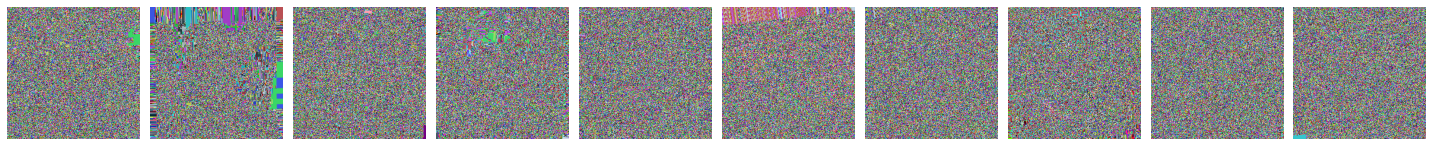

In [ ]:
optimizer = Adam(learning_rate=0.0001)
callbacks = [EarlyStopping(monitor="val_loss", patience = 5, restore_best_weights=True)]
EPOCHS = 10000
BATCH_SIZE = 32
IMAGE_DIM = 224
TARGATE_SIZE = (IMAGE_DIM,IMAGE_DIM)
INPUT_SHAPE = (IMAGE_DIM,IMAGE_DIM,3)

train_batchs,  valid_batchs = get_train_val_batch(train_path,TARGATE_SIZE,classes,BATCH_SIZE,rotation_range=10,height_shift_range=0.1,horizontal_flip=True, zoom_range=0.1, shuffle = True)
test_batchs = get_test_batch(test_path,TARGATE_SIZE,classes,len(classes))

aug_images = [((next(train_batchs)[0][i]+ 1)*127.5).astype(np.uint8) for i in range(10)]
plotImages(aug_images)

553476096/553467096 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                       

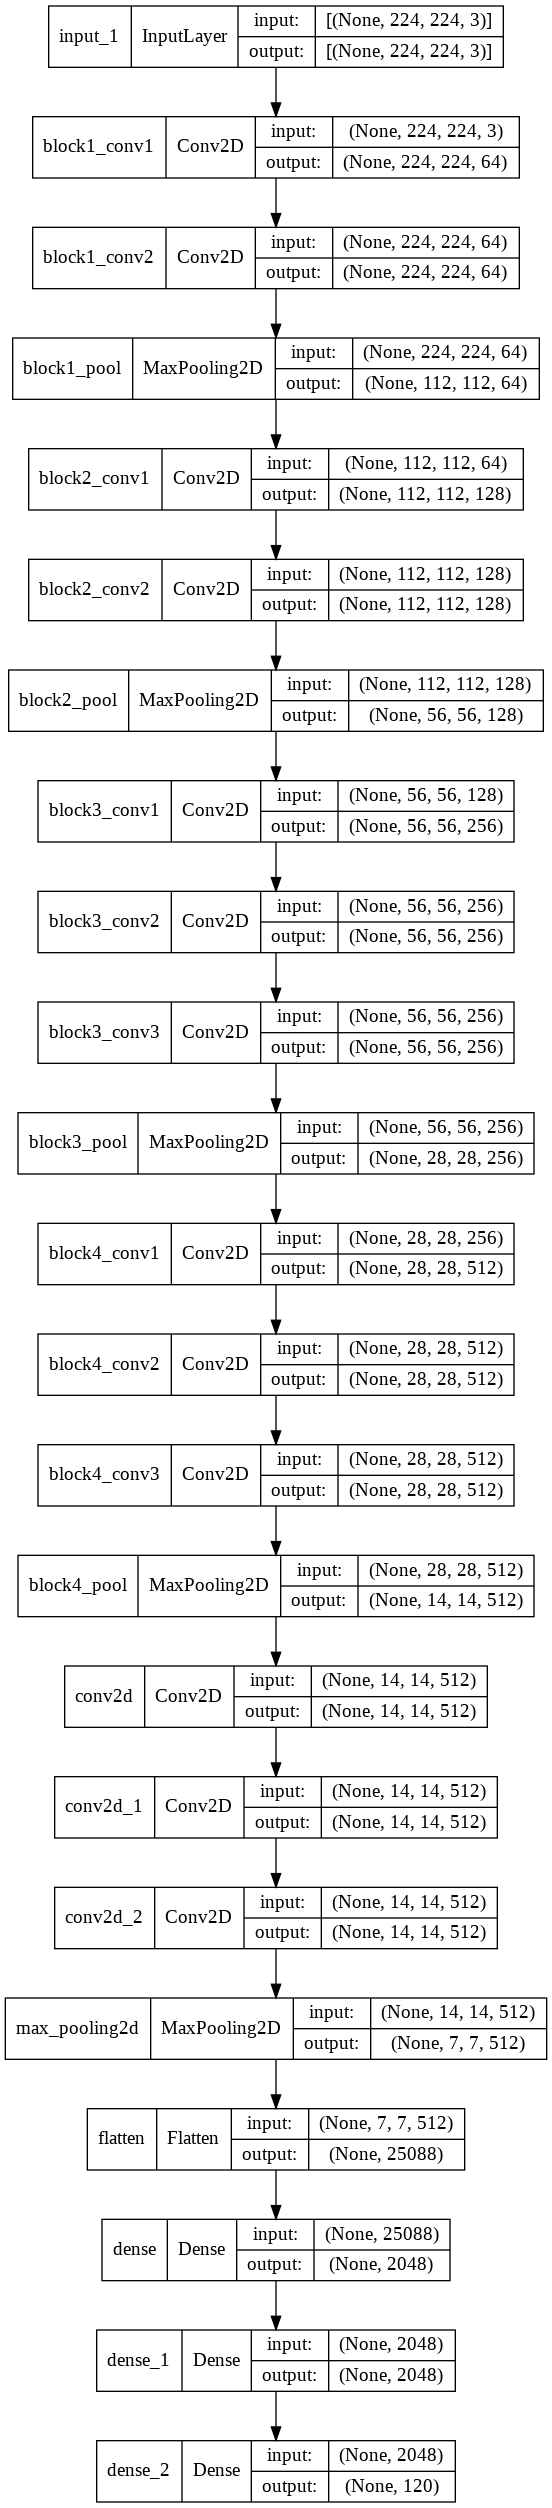

In [ ]:
model1 = build_model(INPUT_SHAPE , summary = False, num_layers_remove=7)
model1.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model1.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model1.add(Conv2D(filters=512,kernel_size=(3,3),padding="same",activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=2))
model1.add(Flatten())
model1.add(Dense(units=2048,activation="relu"))
model1.add(Dense(units=2048,activation="relu"))
model1.add(Dense(units=len(classes),activation="softmax"))

model1.summary()
plot_model(model1, show_shapes=True, show_layer_names=True)

In [ ]:
history = train_model(model1, train_batchs, valid_batchs, EPOCHS,optimizer, callbacks = callbacks)

Epoch 1/10000
135/135 [==============================] - 980s 7s/step - loss: 24.2568 - accuracy: 0.0097 - val_loss: 4.8116 - val_accuracy: 0.0083
Epoch 2/10000
135/135 [==============================] - 96s 713ms/step - loss: 4.8084 - accuracy: 0.0118 - val_loss: 4.7989 - val_accuracy: 0.0063
Epoch 3/10000
135/135 [==============================] - 96s 712ms/step - loss: 4.7933 - accuracy: 0.0134 - val_loss: 4.7971 - val_accuracy: 0.0083
Epoch 4/10000
135/135 [==============================] - 97s 717ms/step - loss: 4.7833 - accuracy: 0.0120 - val_loss: 4.7861 - val_accuracy: 0.0125
Epoch 5/10000
135/135 [==============================] - 96s 711ms/step - loss: 4.7512 - accuracy: 0.0150 - val_loss: 4.7795 - val_accuracy: 0.0063
Epoch 6/10000
135/135 [==============================] - 97s 718ms/step - loss: 4.6613 - accuracy: 0.0250 - val_loss: 4.7045 - val_accuracy: 0.0312
Epoch 7/10000
135/135 [==============================] - 96s 710ms/step - loss: 4.3610 - accuracy: 0.0491 - val_l

Now that the model has stopped training after 19 epochs, we see that the model has reached 74% accuracy on the training set but the valitaion accuracy only reached 29% and the validation loss has stopped improving after the 14 epoch.

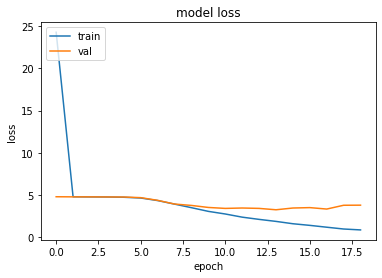

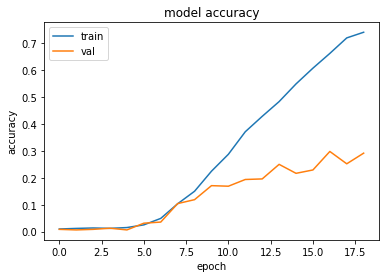

The model accuracy on train data is: 0.61
The model accuracy on validation data is: 0.23


In [ ]:
plot_history(history)

In [ ]:
predictions = test_model(model1, test_batchs)
eval_preformance(predictions,test_batchs,classes)

CNN Model, with 0.23333333333333334% accuracy on test set


<h4>Conclusion</h4>
We see that the model has managed to learn the training data but has reached overfitting.

# Experiment number 2:

For this experiment we used the same hyper parameters and augmentation, we only replaced VGG16's fully connected layers with our own. Our goal is to fined out if the VGG16 feature extractor can extract better high level features then if we re-train it ourselfs.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

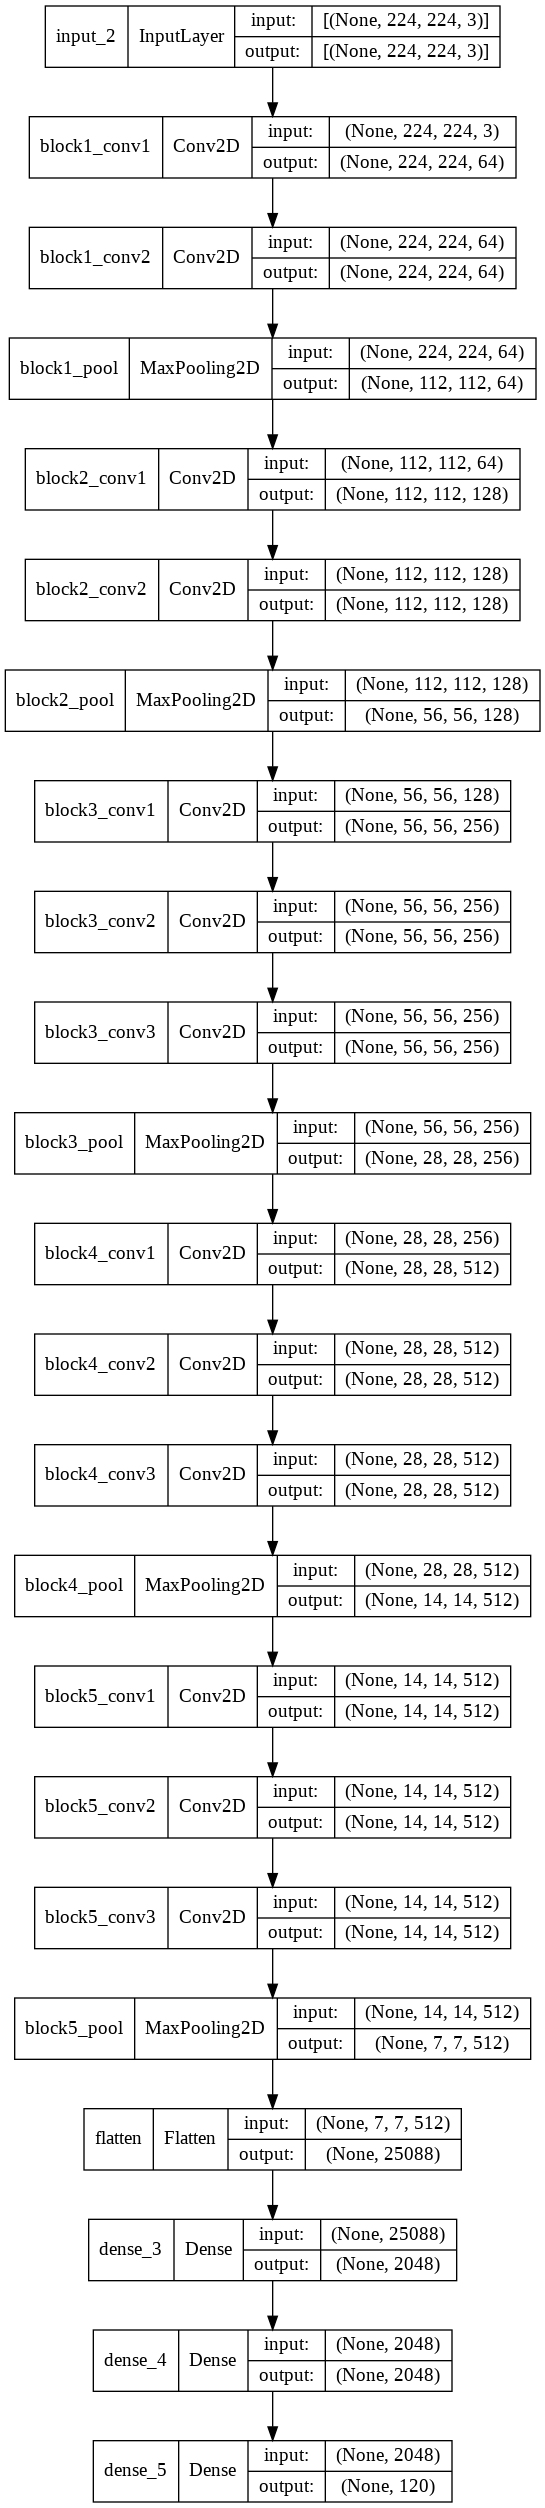

In [ ]:
model2 = build_model(INPUT_SHAPE , summary = False, num_layers_remove=2)
model2.add(Dense(units=2048,activation="relu"))
model2.add(Dense(units=2048,activation="relu"))
model2.add(Dense(units=len(classes),activation="softmax"))

model2.summary()
plot_model(model2, show_shapes=True, show_layer_names=True)

In [ ]:
history = train_model(model2, train_batchs, valid_batchs, EPOCHS,optimizer, callbacks = callbacks)

Epoch 1/10000
135/135 [==============================] - 96s 704ms/step - loss: 11.6091 - accuracy: 0.1296 - val_loss: 3.6446 - val_accuracy: 0.2313
Epoch 2/10000
135/135 [==============================] - 93s 688ms/step - loss: 2.2558 - accuracy: 0.4451 - val_loss: 2.8015 - val_accuracy: 0.3521
Epoch 3/10000
135/135 [==============================] - 93s 689ms/step - loss: 1.4236 - accuracy: 0.6317 - val_loss: 2.8766 - val_accuracy: 0.3875
Epoch 4/10000
135/135 [==============================] - 93s 690ms/step - loss: 0.9505 - accuracy: 0.7424 - val_loss: 2.5538 - val_accuracy: 0.4583
Epoch 5/10000
135/135 [==============================] - 92s 681ms/step - loss: 0.6585 - accuracy: 0.8113 - val_loss: 2.5109 - val_accuracy: 0.4604
Epoch 6/10000
135/135 [==============================] - 92s 679ms/step - loss: 0.5050 - accuracy: 0.8523 - val_loss: 2.5358 - val_accuracy: 0.4771
Epoch 7/10000
135/135 [==============================] - 92s 680ms/step - loss: 0.3797 - accuracy: 0.8928 - val

Now that the model has stopped training after 10 epochs, we see that the model has reached 94% accuracy on the training set but the valitaion accuracy only reached 50% and the validation loss has stopped improving after the 5 epoch.

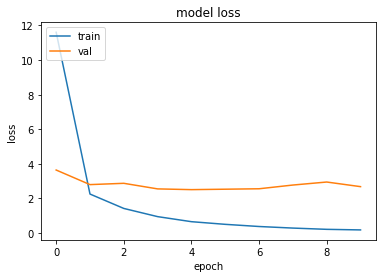

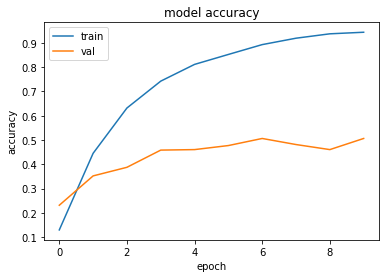

The model accuracy on train data is: 0.89
The model accuracy on validation data is: 0.51


In [ ]:
plot_history(history)

In [ ]:
predictions = test_model(model2, test_batchs)
eval_preformance(predictions,test_batchs,classes)

CNN Model, with 0.4775% accuracy on test set


<h4>Conclusions</h4>
This time our model still reached overfitting but, has managed to learn and generalize our data much better then the previous model, achiving 48% accuracy on our test set.</br>
Therefore our main conclusion with this experiment is that the VGG16 model can extract better high level features then we could at the last experiment.</br>
Although this model has improved the accuracy on the validation and test set, we see that the validation accuracy and loss has stopped improving alot earlier then the train accuracy and loss.

# Experiment number 3:

As part of our conclusions, we see that using VGG16 as our feature extractor and adding fully connected layers on top of it. At this experiment we try to combat the overfitting issue that apeared the last experiment. Therefore we added 2 dropout layers that during training the forward pass of your network just randomly set some of the neurons to zero, this does not effect predictions.

553476096/553467096 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                       

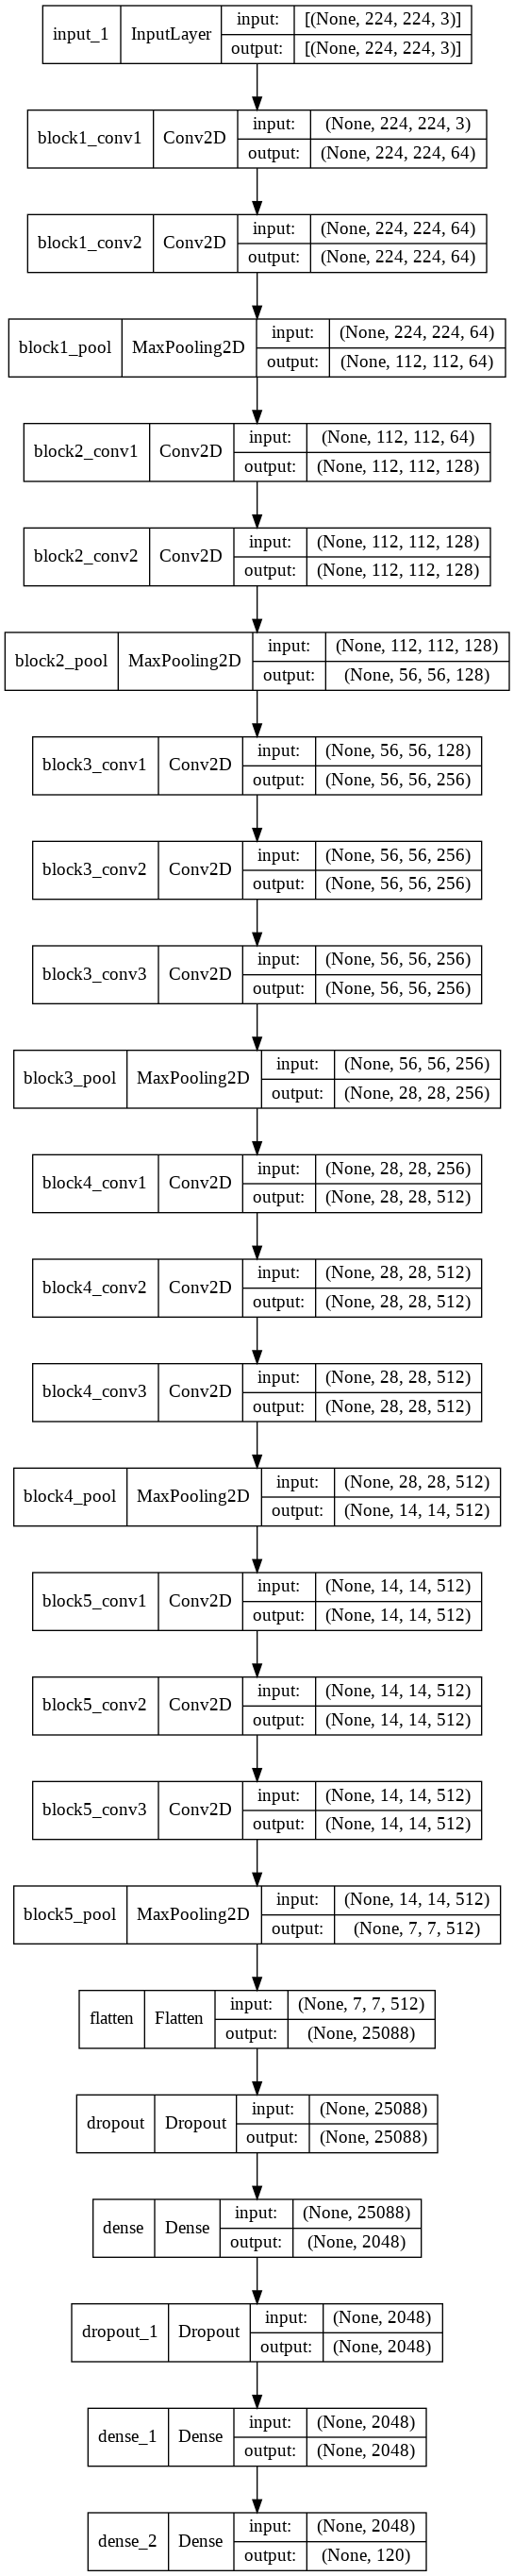

In [ ]:
model3 = build_model(INPUT_SHAPE , summary = False, num_layers_remove=2)
model3.add(Dropout(0.5))
model3.add(Dense(units=2048,activation="relu"))
model3.add(Dropout(0.5))
model3.add(Dense(units=2048,activation="relu"))
model3.add(Dense(units=len(classes),activation="softmax"))

model3.summary()
plot_model(model3, show_shapes=True, show_layer_names=True)

In [ ]:
history = train_model(model3, train_batchs, valid_batchs, EPOCHS,optimizer, callbacks = callbacks)

Epoch 1/10000
135/135 [==============================] - 908s 7s/step - loss: 29.2909 - accuracy: 0.0264 - val_loss: 5.7701 - val_accuracy: 0.1083
Epoch 2/10000
135/135 [==============================] - 89s 657ms/step - loss: 11.5198 - accuracy: 0.0808 - val_loss: 3.9385 - val_accuracy: 0.1542
Epoch 3/10000
135/135 [==============================] - 88s 651ms/step - loss: 7.4447 - accuracy: 0.1116 - val_loss: 3.8330 - val_accuracy: 0.1604
Epoch 4/10000
135/135 [==============================] - 88s 652ms/step - loss: 5.5726 - accuracy: 0.1382 - val_loss: 3.6891 - val_accuracy: 0.1708
Epoch 5/10000
135/135 [==============================] - 88s 648ms/step - loss: 4.7474 - accuracy: 0.1597 - val_loss: 3.5023 - val_accuracy: 0.2125
Epoch 6/10000
135/135 [==============================] - 88s 650ms/step - loss: 4.2424 - accuracy: 0.2032 - val_loss: 3.3845 - val_accuracy: 0.2438
Epoch 7/10000
135/135 [==============================] - 88s 648ms/step - loss: 3.8967 - accuracy: 0.2157 - val_

Now that the model has stopped training after 29 epochs, we see that the model has reached 62% accuracy on the training set but the valitaion accuracy only reached 46% and the validation loss has stopped improving after the 24 epoch.

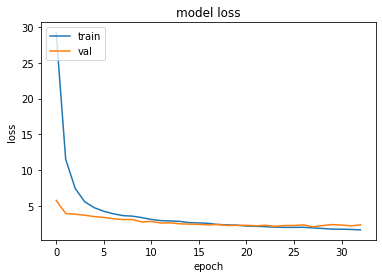

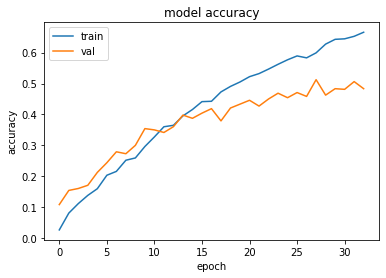

The model accuracy on train data is: 0.64
The model accuracy on validation data is: 0.48


In [ ]:
plot_history(history)

In [ ]:
predictions = test_model(model3, test_batchs)
eval_preformance(predictions,test_batchs,classes)

CNN Model, with 0.515% accuracy on test set


<h4>Conclusions</h4>
A part of our goal was to combat overfitting and have the train and validation loss and accuracy improve togather.
As plotted above we see that we managed to achive our goal, although our model has preformed worse on our training data compered to the previus model, both train and validation accuracy improved togather, showing that the model is not overfitted and is able to learn and generalize our data.

# Experiment number 4 (The Chosen architecture):

For our final experiment, we added 3 "Batch Normlization" layers that will standardizes the inputs to a layer for each mini-batch. It ensures that the inputs to all layers share the same distribution throughout training. We also added "L2" regularizer in attempt to have our model learn simpler weights. "L2" regularizer avoids overfitting by panelizing the regression coefficients of high value. More specifically, it decreases the parameters and simplifies the model.

553476096/553467096 [==============================] - 12s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                      

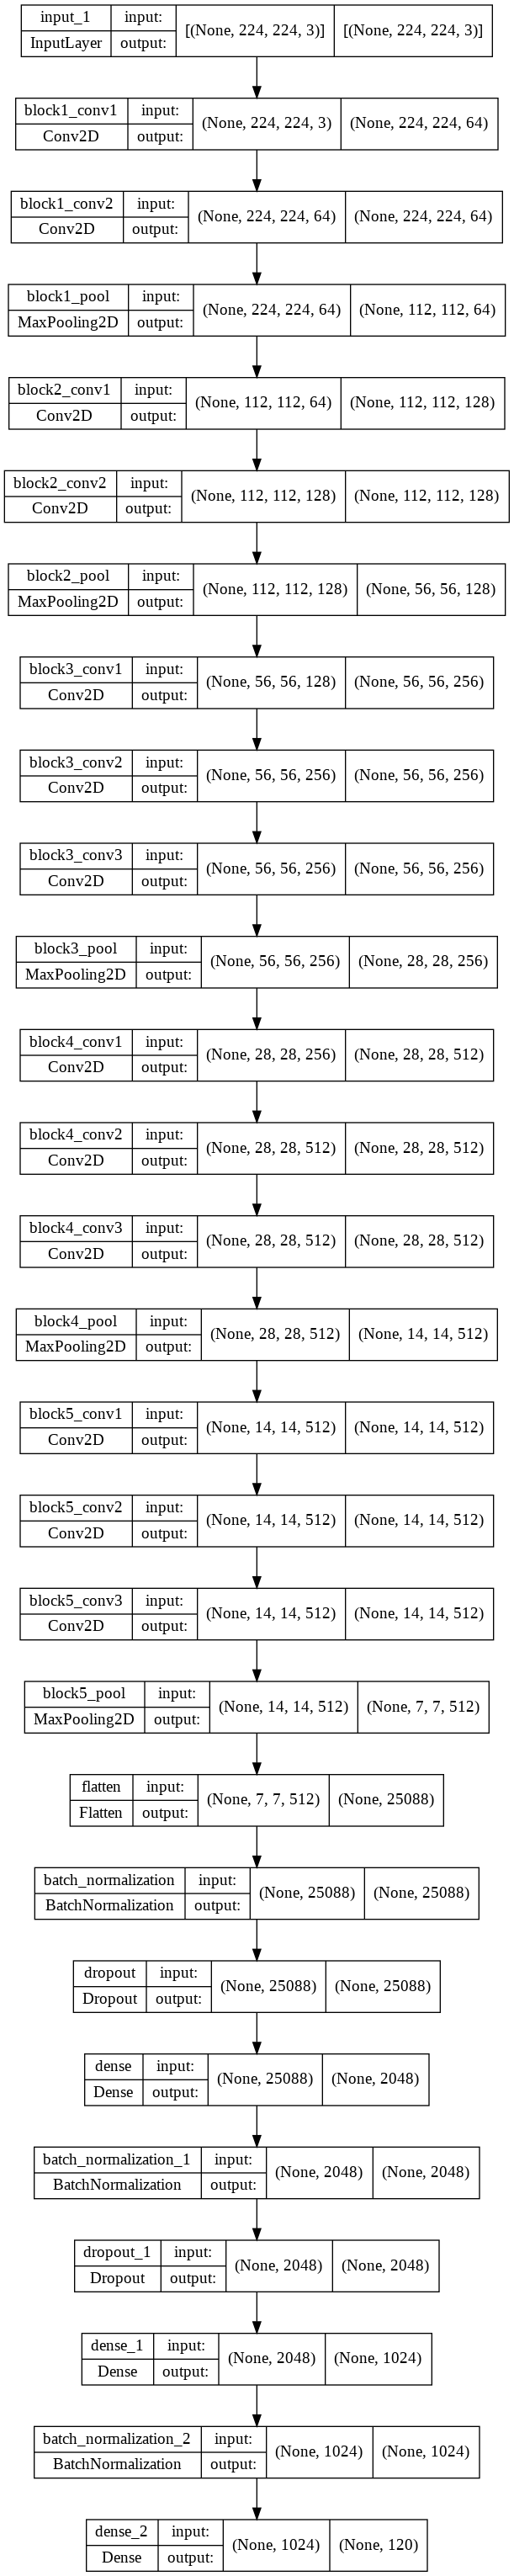

In [ ]:
model4 = build_model(INPUT_SHAPE , summary = False, num_layers_remove=2)

model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(units=2048,activation="relu", activity_regularizer = keras.regularizers.l2(1e-5)))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(units=1024,activation="relu", activity_regularizer = keras.regularizers.l2(1e-5)))
model4.add(BatchNormalization())
model4.add(Dense(units=len(classes),activation="softmax"))
model4.summary()
plot_model(model4, show_shapes=True, show_layer_names=True)

In [ ]:
history = train_model(model4, train_batchs, valid_batchs, EPOCHS,optimizer, callbacks = callbacks)

Epoch 1/10000
135/135 [==============================] - 1001s 7s/step - loss: 5.0546 - accuracy: 0.0400 - val_loss: 3.6540 - val_accuracy: 0.1708
Epoch 2/10000
135/135 [==============================] - 100s 738ms/step - loss: 3.5248 - accuracy: 0.2074 - val_loss: 2.8998 - val_accuracy: 0.3208
Epoch 3/10000
135/135 [==============================] - 100s 739ms/step - loss: 2.5965 - accuracy: 0.3919 - val_loss: 2.4375 - val_accuracy: 0.4042
Epoch 4/10000
135/135 [==============================] - 99s 732ms/step - loss: 2.0575 - accuracy: 0.5074 - val_loss: 2.1959 - val_accuracy: 0.4417
Epoch 5/10000
135/135 [==============================] - 100s 738ms/step - loss: 1.6720 - accuracy: 0.6046 - val_loss: 2.0014 - val_accuracy: 0.4854
Epoch 6/10000
135/135 [==============================] - 101s 745ms/step - loss: 1.3795 - accuracy: 0.6769 - val_loss: 1.9092 - val_accuracy: 0.4958
Epoch 7/10000
135/135 [==============================] - 99s 735ms/step - loss: 1.1882 - accuracy: 0.7280 - v

Now that the model has stopped training after 23 epochs, we see that the model has reached 96% accuracy on the training set and 57% accuracy and the validation loss has stopped improving after the 18 epoch.

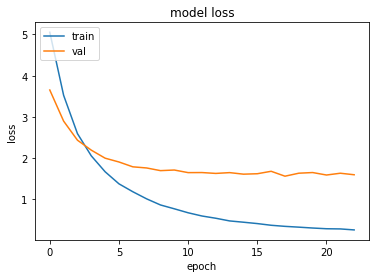

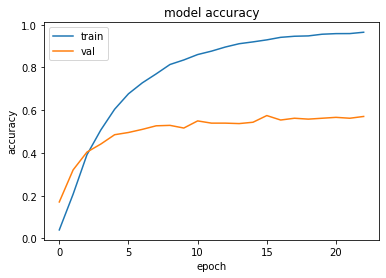

The model accuracy on train data is: 0.96
The model accuracy on validation data is: 0.56


In [ ]:
plot_history(history)

In [ ]:
predictions = test_model(model4, test_batchs)
eval_preformance(predictions,test_batchs,classes)

CNN Model, with 0.5783333333333334% accuracy on test set


In [ ]:
model4.save("the_chosen_transfer_model.h5")

<h4>Conclusions</h4>
We see that using "Batch Normalization" and the "L2" regularizer has improved our models preformence, compared to the previus model that achived 2.1395 loss and 46% accuracy on the validation data, this model has achived 1.5648 loss and 56% accuracy on the validation data.